機械学習特論 第6回 ランダムフォレスト で mnist を分類

In [1]:
# google colab で実行する場合は、次の行の先頭の # を削除してこのブロックを実行する
#!pip install japanize-matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [3]:
from sklearn.datasets import fetch_openml
# 手書き文字のデータセットをダウンロードして、実験用データを準備 (70000枚のうち7000枚を利用)
mnist_data = fetch_openml('mnist_784', version=1)
_x = np.array(mnist_data['data'].astype(np.float32))
_y = np.array(mnist_data['target'].astype(np.int32))
_, x, _, y = train_test_split(_x, _y, test_size=0.1, random_state=1)

In [4]:
# データを学習用と検証用に分割
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=2) # 検証用データに25%を割当て
print(f'x_train:{len(x_train)} x_test:{len(x_test)} y_train:{len(y_train)} y_test:{len(y_test)}')

x_train:5250 x_test:1750 y_train:5250 y_test:1750


In [5]:
# 学習データを利用してランダムフォレストを学習
clf = RandomForestClassifier(max_depth=5, # 木の深さの最大
                             n_estimators=10, # 木の数
                             random_state=2) # 乱数シード
clf = clf.fit(x_train, y_train)

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
predict_train = clf.predict(x_train)
predict_test = clf.predict(x_test)
print('max_depth=5, accuracy_score: ', 
      f'train data : {metrics.accuracy_score(y_train, predict_train): 0.5}', 
      f'test data : {metrics.accuracy_score(y_test, predict_test): 0.5}')

max_depth=5, accuracy_score:  train data :  0.82686 test data :  0.78229


重要度がゼロの画素数: 595 / 784 (0.7589285714285714)
重要度が高い画素(上位20件):
0 (346, 0.029930852055498752)
1 (351, 0.02828288669567864)
2 (318, 0.024972980984361265)
3 (568, 0.02138555145402842)
4 (354, 0.020464409603141796)
5 (374, 0.019307508767401577)
6 (488, 0.018384470310913385)
7 (409, 0.018169090594446026)
8 (437, 0.01815557134049691)
9 (350, 0.0163762973302272)
10 (290, 0.016006303259525137)
11 (380, 0.015975563391768373)
12 (655, 0.015220518739480316)
13 (152, 0.014113676203011832)
14 (495, 0.013898020509672687)
15 (569, 0.013656357566211013)
16 (358, 0.013226794185758478)
17 (206, 0.012911833196255112)
18 (596, 0.012715779965010329)
19 (486, 0.012621073563001942)
20 (456, 0.012351232789534747)


C:\Users\khiramatsu\AppData\Local\Temp/ipykernel_21960/1080762755.py:20: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.array(np.log(img)).reshape(28,28), cmap=plt.cm.gray_r)


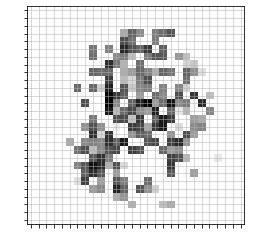

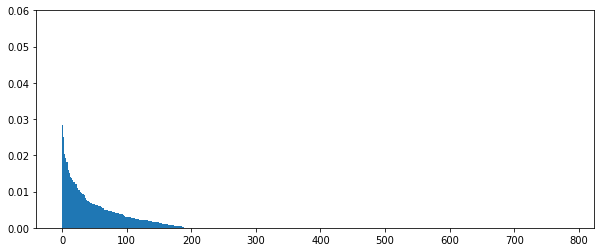

In [6]:
# 画素の重要度を確認
importance = {}
img = []
zero_importance = 0
for i in range(len(clf.feature_importances_)):
    importance[i] = clf.feature_importances_[i]
    img.append(clf.feature_importances_[i])
    if clf.feature_importances_[i] == 0.0:
        zero_importance = zero_importance + 1
print('重要度がゼロの画素数:', zero_importance, '/', len(importance), f'({zero_importance/len(importance)})')
print('重要度が高い画素(上位20件):')
importance_sorted = sorted(importance.items(), key=lambda x:x[1], reverse=True)
i = 0
for _importance_sorted in importance_sorted:
    print(i, _importance_sorted)
    i = i + 1
    if i > 20:
        break

plt.imshow(np.array(np.log(img)).reshape(28,28), cmap=plt.cm.gray_r)
plt.xticks(np.linspace(0,27,28))
plt.yticks(np.linspace(0,27,28))
plt.xticks(color="None")
plt.yticks(color="None")
plt.grid(linewidth=0.5)
plt.show()

plt.figure(figsize=[10,4])
plt.bar(np.linspace(0,len(img),len(img)), sorted(img, reverse=True), width=1.0)
plt.ylim(0,0.06)
plt.show()

In [7]:
# ランダムフォレストの木の深さ、木の数を変え、学習用データと検証用データで性能を確認
train_score = [] # グラフ用のリスト
test_score = [] # グラフ用のリスト
N = 20
for i in range(N): # 木の深さ (1-(N-1) iに1を足して利用)
    for j in range(N): # 木の数 (1-(N-1) jに1を足して利用)
        # ランダムフォレストを学習データを利用して学習
        clf = RandomForestClassifier(max_depth=i+1, # 木の深さの最大
                                     n_estimators=j+1, # 木の数
                                     random_state=2) # 乱数シード
        clf = clf.fit(x_train, y_train)

        # 学習したモデルの性能(正答率)を学習用データと検証用データで評価
        # 計算した性能はグラフ用のリストに格納
        predict_train = clf.predict(x_train)
        train_score.append(metrics.accuracy_score(y_train, predict_train))
        predict_test = clf.predict(x_test)
        test_score.append(metrics.accuracy_score(y_test, predict_test))
        print(f'max_depth={i+1}, n_estimators={j+1} accuracy_score: ', 
            f'train data : {train_score[i*N+j]: 0.5}', 
            f'test data : {test_score[i*N+j]: 0.5}')

max_depth=1, n_estimators=1 accuracy_score:  train data :  0.19867 test data :  0.18686
max_depth=1, n_estimators=2 accuracy_score:  train data :  0.3059 test data :  0.29429
max_depth=1, n_estimators=3 accuracy_score:  train data :  0.27943 test data :  0.28286
max_depth=1, n_estimators=4 accuracy_score:  train data :  0.27752 test data :  0.27143
max_depth=1, n_estimators=5 accuracy_score:  train data :  0.31638 test data :  0.30743
max_depth=1, n_estimators=6 accuracy_score:  train data :  0.35752 test data :  0.34
max_depth=1, n_estimators=7 accuracy_score:  train data :  0.36267 test data :  0.35657
max_depth=1, n_estimators=8 accuracy_score:  train data :  0.34514 test data :  0.33143
max_depth=1, n_estimators=9 accuracy_score:  train data :  0.37257 test data :  0.36286
max_depth=1, n_estimators=10 accuracy_score:  train data :  0.36114 test data :  0.35086
max_depth=1, n_estimators=11 accuracy_score:  train data :  0.36114 test data :  0.34629
max_depth=1, n_estimators=12 accur

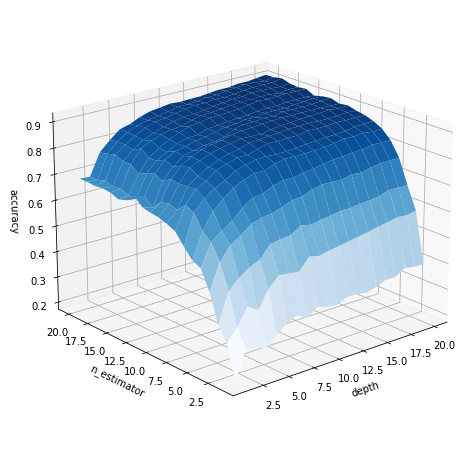

In [8]:
# 木の深さ、木の数に対するランダムフォレストの性能をグラフで表示
x1 = np.linspace(1, N, N)
x2 = np.linspace(1, N, N)
X1, X2 = np.meshgrid(x1, x2)
fig = plt.figure(figsize=[15,8])
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, np.array(test_score).reshape(N,N), cmap='Blues')
ax.view_init(elev=20, azim=-130)
ax.set_xlabel('depth')
ax.set_ylabel('n_estimator')
ax.set_zlabel('accuracy')
plt.show()

max_depth=1, accuracy_score:  train data :  0.81771 test data :  0.66686
max_depth=2, accuracy_score:  train data :  0.87429 test data :  0.70629
max_depth=3, accuracy_score:  train data :  0.92857 test data :  0.77029
max_depth=4, accuracy_score:  train data :  0.95467 test data :  0.82
max_depth=5, accuracy_score:  train data :  0.96343 test data :  0.83543
max_depth=6, accuracy_score:  train data :  0.9701 test data :  0.852
max_depth=7, accuracy_score:  train data :  0.97505 test data :  0.86
max_depth=8, accuracy_score:  train data :  0.98152 test data :  0.86857
max_depth=9, accuracy_score:  train data :  0.98248 test data :  0.87714
max_depth=10, accuracy_score:  train data :  0.98343 test data :  0.876
max_depth=11, accuracy_score:  train data :  0.98476 test data :  0.87429
max_depth=12, accuracy_score:  train data :  0.98648 test data :  0.88171
max_depth=13, accuracy_score:  train data :  0.98705 test data :  0.888
max_depth=14, accuracy_score:  train data :  0.98857 test da

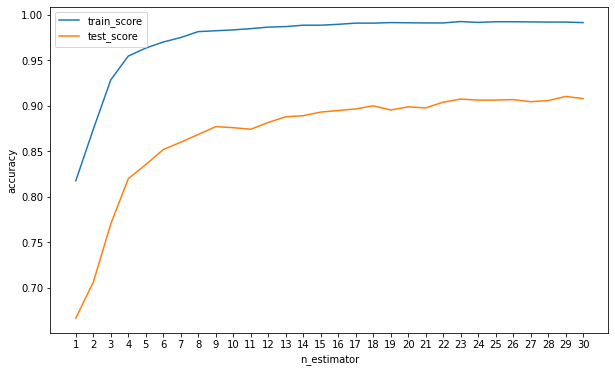

In [9]:
# 木の数を変えて学習したランダムフォレストの性能を学習用データと検証用データで確認
N = 30
_x = np.linspace(1, N, N) # グラフのx軸の設定 (1から7までの7点)
train_score = [] # グラフ用のリスト
test_score = [] # グラフ用のリスト
for i in range(N):
    clf = RandomForestClassifier(max_depth=10, # 木の深さの最大
                                    n_estimators=i+1, # 木の数
                                    random_state=2) # 乱数シード
    clf = clf.fit(x_train, y_train)  # * y_trainの列指定はwarning回避のため *

    # 学習したモデルの性能(正答率)を学習用データと検証用データで評価
    predict_train = clf.predict(x_train)
    train_score.append(metrics.accuracy_score(y_train, predict_train))
    predict_test = clf.predict(x_test)
    test_score.append(metrics.accuracy_score(y_test, predict_test))
    print(f'max_depth={i+1}, accuracy_score: ', 
            f'train data : {train_score[i]: 0.5}', 
            f'test data : {test_score[i]: 0.5}')

# 木の深さに対する決定木の性能をグラフで表示
plt.figure(figsize=[10,6])
plt.plot(_x, train_score, label='train_score')
plt.plot(_x, test_score, label='test_score')
plt.xlabel('n_estimator')
plt.ylabel('accuracy')
plt.xticks(_x)
plt.legend()
plt.show()

max_depth=1, accuracy_score:  train data :  0.36114 test data :  0.35086
max_depth=2, accuracy_score:  train data :  0.54076 test data :  0.52857
max_depth=3, accuracy_score:  train data :  0.65981 test data :  0.632
max_depth=4, accuracy_score:  train data :  0.74648 test data :  0.724
max_depth=5, accuracy_score:  train data :  0.82686 test data :  0.78229
max_depth=6, accuracy_score:  train data :  0.872 test data :  0.83886
max_depth=7, accuracy_score:  train data :  0.91524 test data :  0.844
max_depth=8, accuracy_score:  train data :  0.94667 test data :  0.87257
max_depth=9, accuracy_score:  train data :  0.97276 test data :  0.87543
max_depth=10, accuracy_score:  train data :  0.98343 test data :  0.876
max_depth=11, accuracy_score:  train data :  0.99219 test data :  0.88629
max_depth=12, accuracy_score:  train data :  0.99524 test data :  0.87943
max_depth=13, accuracy_score:  train data :  0.99714 test data :  0.87657
max_depth=14, accuracy_score:  train data :  0.99733 test

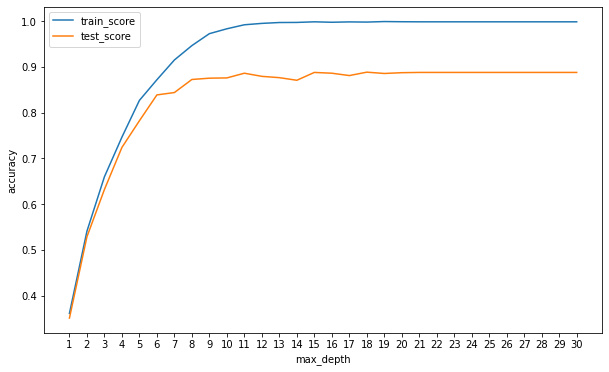

In [10]:
# 木の数を変えて学習したランダムフォレストの性能を学習用データと検証用データで確認
N = 30
_x = np.linspace(1, N, N) # グラフのx軸の設定 (1から7までの7点)
train_score = [] # グラフ用のリスト
test_score = [] # グラフ用のリスト
for i in range(N):
    clf = RandomForestClassifier(max_depth=i+1, # 木の深さの最大
                                    n_estimators=10, # 木の数
                                    random_state=2) # 乱数シード
    clf = clf.fit(x_train, y_train)  # * y_trainの列指定はwarning回避のため *

    # 学習したモデルの性能(正答率)を学習用データと検証用データで評価
    predict_train = clf.predict(x_train)
    train_score.append(metrics.accuracy_score(y_train, predict_train))
    predict_test = clf.predict(x_test)
    test_score.append(metrics.accuracy_score(y_test, predict_test))
    print(f'max_depth={i+1}, accuracy_score: ', 
            f'train data : {train_score[i]: 0.5}', 
            f'test data : {test_score[i]: 0.5}')

# 木の深さに対する決定木の性能をグラフで表示
plt.figure(figsize=[10,6])
plt.plot(_x, train_score, label='train_score')
plt.plot(_x, test_score, label='test_score')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(_x)
plt.legend()
plt.show()